In [1]:
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.kmeans import kmeans
import numpy as np
 

#导入npy文件路径位置
test = np.load('C:\\Users\\15957\\Desktop\\2023\\data mining\\project\\npy_embs\\ift_cluster_given_fudandm2023-input-bert-base-chinese.npy')

print(test.shape)

(33715, 768)


In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

print(f">>> t-SNE fitting")
tsne = TSNE(n_components=2, init='pca', perplexity=30)
Y = tsne.fit_transform(test)
print(f"<<< fitting over")
print(Y.shape)

>>> t-SNE fitting


C:\Users\15957\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\15957\AppData\Roaming\Python\Python38\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<<< fitting over
(33715, 2)


In [3]:
from pyclustering.cluster.kmeans import distance_metric
from pyclustering.cluster.kmeans import type_metric

def cosine_distance(a, b):
     a_norm = np.linalg.norm(a)
     b_norm = np.linalg.norm(b)
     similiarity = np.dot(a, b.T)/(a_norm * b_norm)
     dist = 1. - similiarity
     return dist
cosine = distance_metric(type_metric.USER_DEFINED, func=cosine_distance)

initial_centers = kmeans_plusplus_initializer(Y, 80).initialize()
kmeans_instance = kmeans(Y, initial_centers, metric=cosine)

In [4]:
kmeans_instance.process()
clusters = kmeans_instance.get_clusters()


In [ ]:
print(clusters)

In [ ]:
pred_labels = np.zeros(len(Y)).astype(int)
print(clusters[len(clusters) - 1])
print(len(pred_labels))
print(len(clusters))
for i in range(len(clusters)):
    for j in range(len(clusters[i])):
        pred_labels[clusters[i][j]] = int(i)
print(pred_labels)


In [7]:
import langid
import jsonlines
from tqdm import tqdm
with jsonlines.open('./datasets/kmeans.jsonl', 'w') as cf:
    with jsonlines.open('./datasets/ift_cluster_given_fudandm2023.jsonl', 'r') as rf:
        print("add label")
        for data,label in zip(tqdm(rf), pred_labels):
            write = data
            write['label'] = str(label)
            cf.write(write)

add label


33715it [00:00, 52272.67it/s]


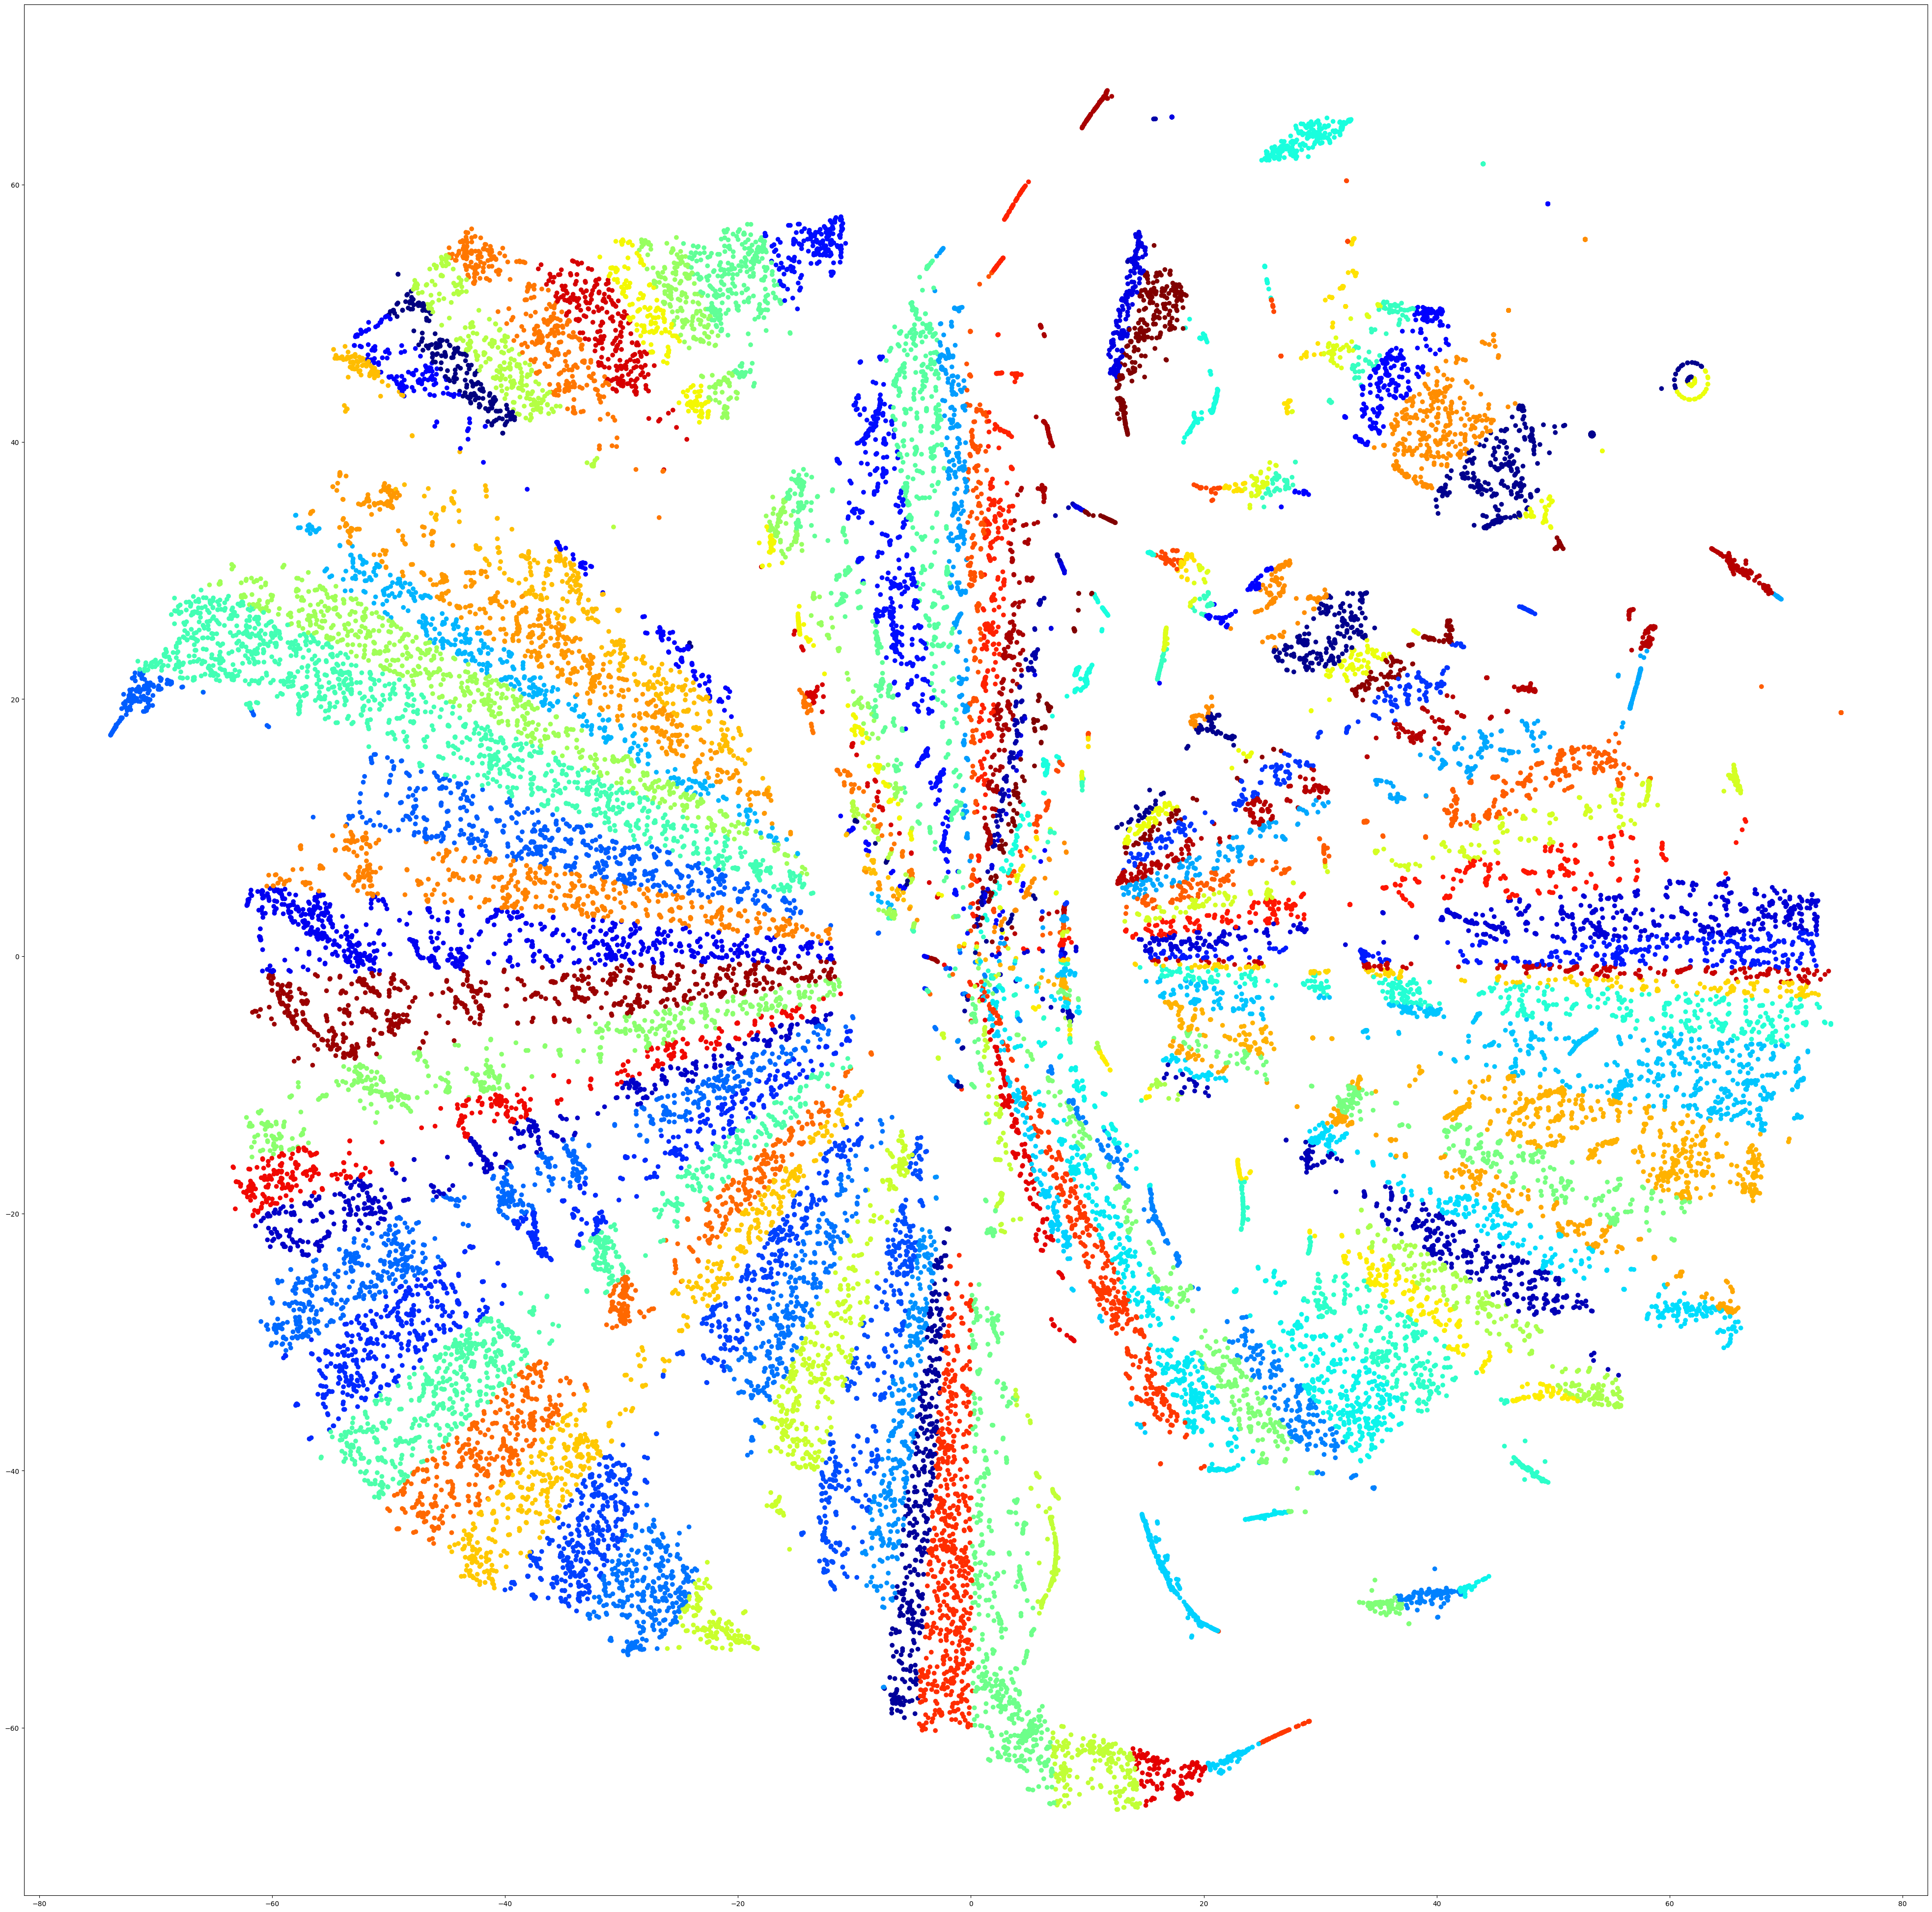

In [8]:
import matplotlib
plt.figure(figsize=(50,50))
plt.scatter(Y[:, 0], Y[:, 1],c=pred_labels, cmap=matplotlib.cm.jet)
plt.savefig("embed50.png")